### Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance 

- Teach for India has approximately 900+ fellows who are deployed across 7 cities and are working with 28000 students. Many of these students do not have the reading and numeracy skills required at their grade level. The ability to predict employee performance will enable TFI to implement learning and development measures to empower their fellows to improve the reading levels of their students.
- Here, I will use Python to create an HR analytics tool that can help a talent management team to predict employee performance and plan for their growth.

In [41]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data into the dataframe

In [42]:
#reading data into the df dataframe
df = pd.read_csv(r"C:\Users\ROG\Downloads\Test_data.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [43]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Data Cleaning

In [44]:
#renaming some of the column names
df.rename(columns={'department':'employee_work_department','region':'employee_region','education':'employee_education_level','gender':'employee_gender','recruitment_channel':'employee_recruitment_channel','no_of_trainings':'no_of_trainings_of_employee','age':'employee_age','previous_year_rating':'employee_previous_year_rating','length_of_service':'employee_length_of_service','KPIs_met >80%':'employee_met_KPI > 80%','awards_won?':'employee_awards_won','avg_training_score':'employee_avg_training_score'}, inplace=True)
df.head()

,employee_id,employee_work_department,employee_region,employee_education_level,employee_gender,employee_recruitment_channel,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_length_of_service,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [45]:
#checking to see if any column contains null values
df.isnull().sum()

employee_id                         0
employee_work_department            0
employee_region                     0
employee_education_level         1034
employee_gender                     0
employee_recruitment_channel        0
no_of_trainings_of_employee         0
employee_age                        0
employee_previous_year_rating    1812
employee_length_of_service          0
employee_met_KPI > 80%              0
employee_awards_won                 0
employee_avg_training_score         0
dtype: int64

In the columns 'employee_education_level' and 'emplpoyee_previous_year_rating' there are some null values.

##### Variable 1: employee_education_level

In [46]:
education_value_counts=df['employee_education_level'].value_counts()
education_value_counts

employee_education_level
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

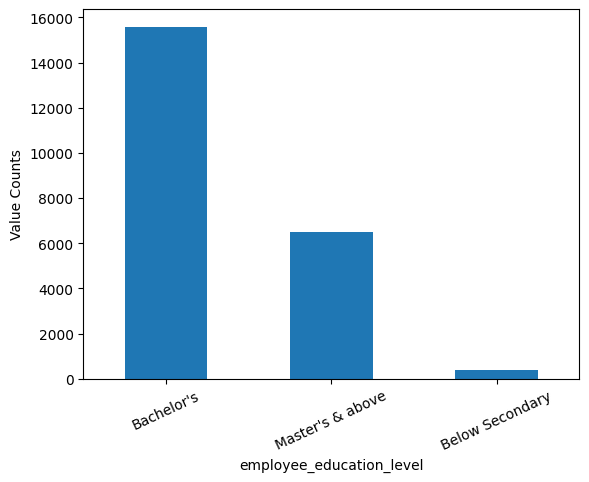

In [47]:
education_value_counts.plot(kind='bar', rot=25)
plt.ylabel('Value Counts')
plt.show()

- The dataset likely represents an organization or a sector where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. This could suggest that the roles in TFI do not necessarily require education beyond a Bachelor's degree, or that such qualifications are less common in the population represented.
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment in the roles included in the TFI. 

In [48]:
#Treating null values in 'employee_education_level' variable

#function to replace null values with Others in the variable
def treat_null_in_education(df, col_name):
    df[col_name] = df[col_name].fillna('Others')

treat_null_in_education(df, 'employee_education_level')

To prevent data loss I labeled the null values with 'Others'. At the end of data cleaning, the goal is to retain as much as data as possible.

In [49]:
new_education_value_counts = df['employee_education_level'].value_counts()
new_education_value_counts

employee_education_level
Bachelor's          15578
Master's & above     6504
Others               1034
Below Secondary       374
Name: count, dtype: int64

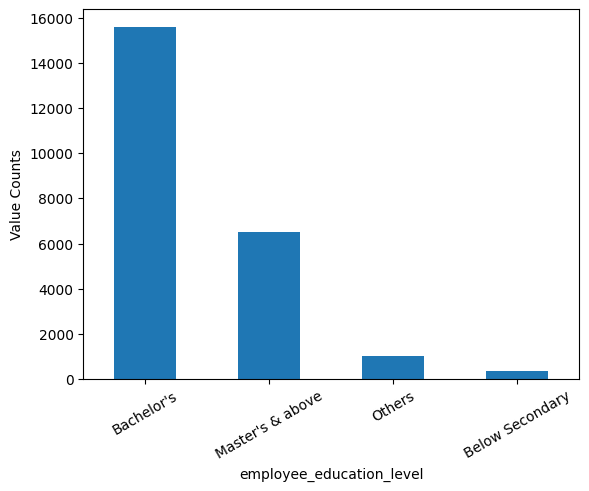

In [50]:
new_education_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

The 'Others' category is now included, which contains a count of the previously missing or null data points in the 'employee_education_level' column.

##### Variable 2: employee_previous_year_rating

In [51]:
#dropping null values from the 'employee_previous_year_rating' column.
df = df.dropna(subset=['employee_previous_year_rating'])

The missing data is not significant enough to bias the results.

In [52]:
rating_value_counts = df['employee_previous_year_rating'].value_counts()

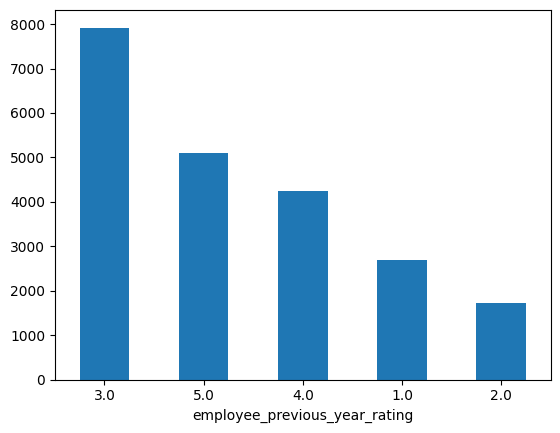

In [53]:
rating_value_counts.plot(kind='bar', rot=0)
plt.show()

- Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
- The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
- Rating '4.0' is slightly less common than '5.0', but still represents a large number of employees.
- Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.

- The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
- The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

In [54]:
#making sure there are no more null values
df.isnull().sum()

employee_id                      0
employee_work_department         0
employee_region                  0
employee_education_level         0
employee_gender                  0
employee_recruitment_channel     0
no_of_trainings_of_employee      0
employee_age                     0
employee_previous_year_rating    0
employee_length_of_service       0
employee_met_KPI > 80%           0
employee_awards_won              0
employee_avg_training_score      0
dtype: int64

After performing data cleaning, there are no more null values present.

### Variable 3: employee_work_department

In [55]:
department_value_counts = df['employee_work_department'].value_counts()

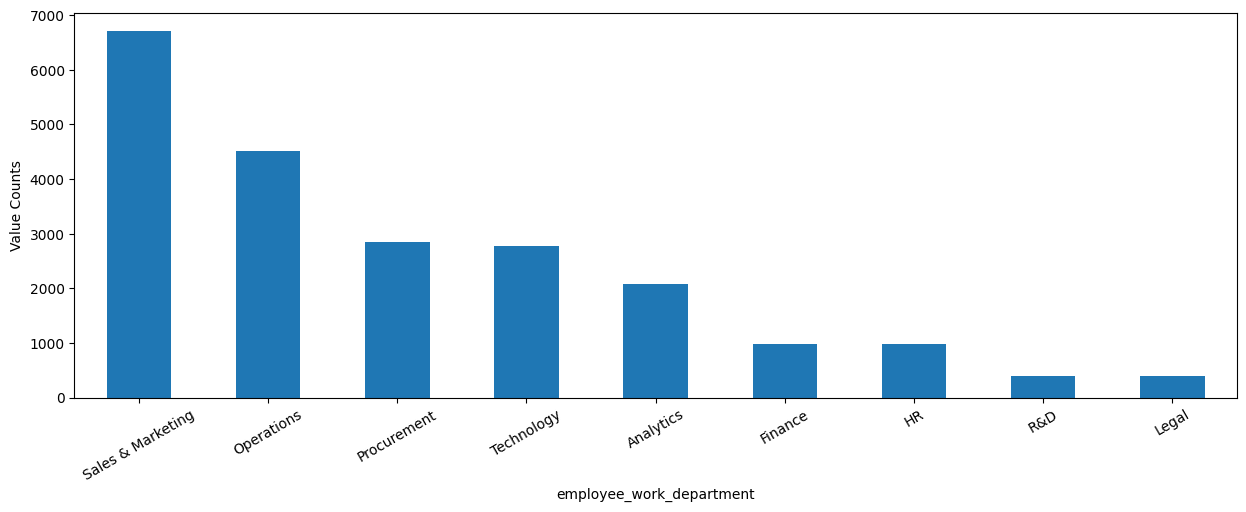

In [56]:
plt.figure(figsize=(15, 5))
department_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

- ' Sales & Marketing' has the highest count, indicating that it is the largest department in terms of employee numbers in this dataset.
- The 'Operations' department follows as the second largest.
- 'Procurement' and 'Technology' have similar counts, suggesting they are smaller but comparably sized departments within the organization.
- 'Analytics', 'Finance', 'HR', 'R&D', and 'Legal' have progressively fewer employees, with 'Legal' being the smallest department.

- The visualization of 'Sales & Marketing' and 'Operations' suggests that these are likely core functions of the business, requiring the most personnel.
- The smaller size of specialized departments like 'R&D' and 'Legal' is typical for many organizations, as these functions may not require as many staff as the more central operational roles.
- Departments such as 'Analytics' and 'Finance' may be support functions that require a moderate number of employees to function effectively across the organization.

### Variable 4: employee_region

In [57]:
region_value_counts = df['employee_region'].value_counts()

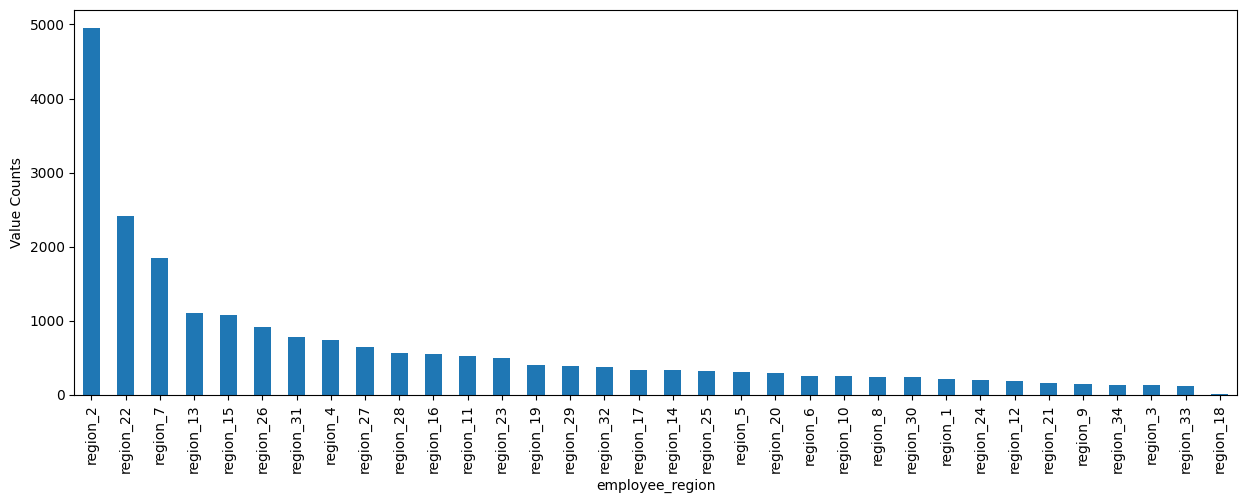

In [58]:
plt.figure(figsize=(15, 5))
region_value_counts.plot(kind='bar')
plt.ylabel('Value Counts')
plt.show()

- The 'region_2' has the highest count of employees, suggesting that this region has the largest employee base within the organization.
- The counts for other regions vary, with 'region_22', 'region_7', and 'region_15' having more employees than the rest but still significantly fewer than 'region_2'.
- The remaining regions have progressively fewer employees, with some regions having very few employees in comparison to 'region_2'.

- The organization may need to focus more HR resources and development programs in 'region_2', given its larger workforce.
- The regions with fewer employees might be areas of potential expansion or may require different management strategies due to their smaller size.

### Variable 5: employee_gender

In [59]:
gender_value_counts = df['employee_gender'].value_counts()

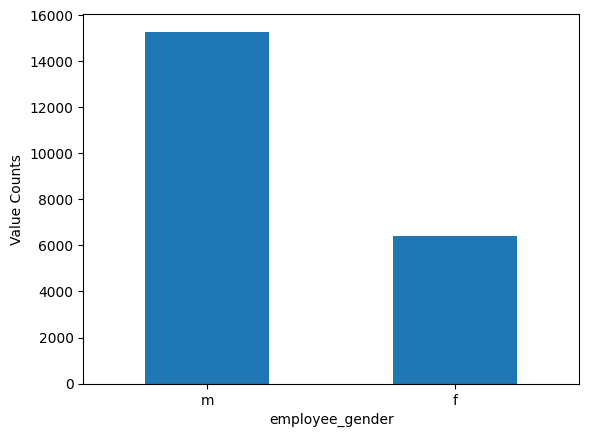

In [60]:
gender_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There are significantly more male employees ('m') than female employees ('f') in this dataset.
- The count of male employees exceeds 14000, while the count of female employees is just over 8000.

- There is a notable gender imbalance in the workforce represented in TFI. This could reflect the hiring practices or the nature of the company.

### Variable 6: employee_recruitment_channel

In [61]:
recruitment_value_counts = df['employee_recruitment_channel'].value_counts()

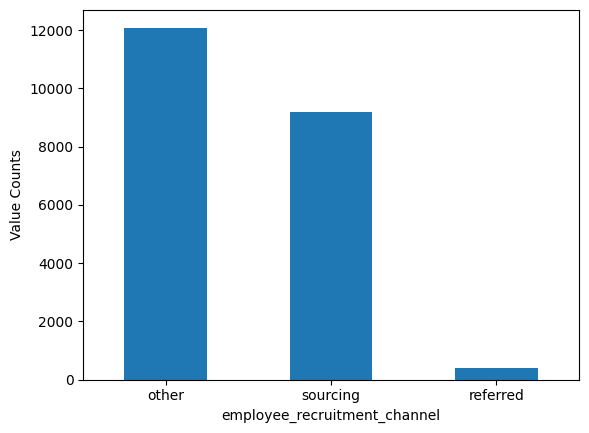

In [62]:
recruitment_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The 'other' category has the highest count, suggesting that many employees were recruited through channels that are not explicitly labeled as 'sourcing' or 'referred'.
- 'Sourcing' is the next most common recruitment channel, with just slightly fewer counts than 'other'.
- The 'referred' category has the lowest count among the three, indicating that fewer employees were hired through referrals compared to other methods.

- The organization uses a variety of recruitment channels, with a significant portion coming from unspecified sources ('other'). These could include online job postings, career fairs, or direct applications to the company.

### Variable 7: no_of_trainings_of_employee

In [63]:
trainings_value_counts = df['no_of_trainings_of_employee'].value_counts()

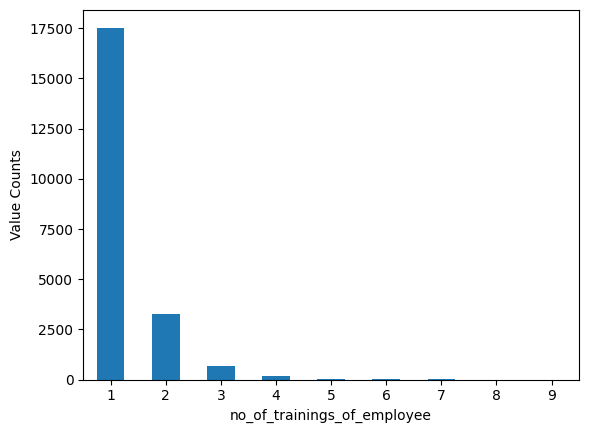

In [64]:
trainings_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A vast majority of employees have attended only one training session, as evidenced by the first bar's height, which far exceeds that of the others.
- There is a steep decline in the number of employees who have attended two training sessions, and an even more pronounced drop for those who have attended three.
- Very few employees have attended more than three training sessions, with the numbers becoming increasingly smaller for higher counts of training attendance.

- The organization might have a policy or culture that encourages or requires all employees to undergo at least one training session.

### Variable 8: employee_age

In [65]:
age_value_counts = df['employee_age'].value_counts()

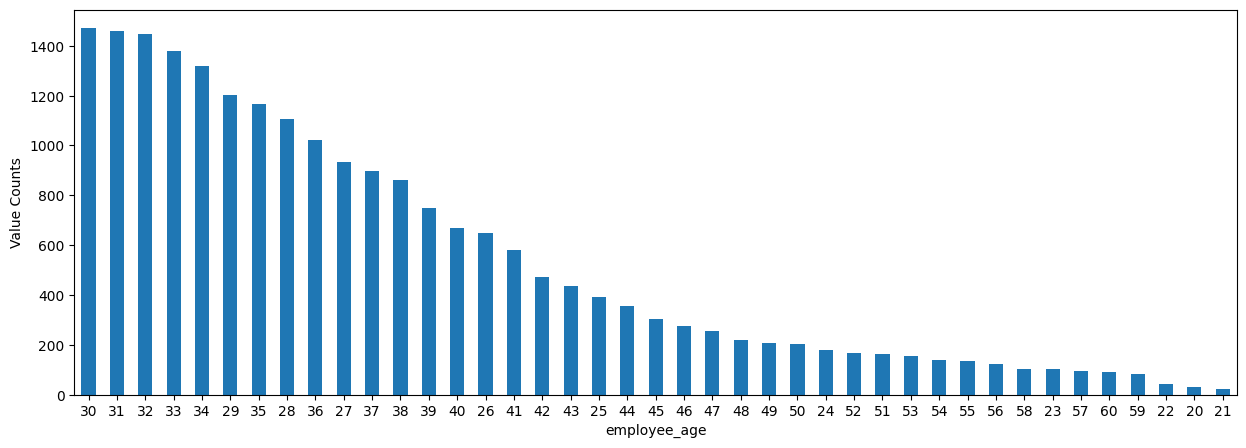

In [66]:
plt.figure(figsize=(15,5))
age_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The workforce is predominantly in the younger age brackets, with the highest count of employees around the age of 30.
- The number of employees gradually decreases with increasing age. This is indicative of a typical age distribution in many organizations, where younger employees outnumber their older counterparts.
- There is a noticeable tapering off as age increases, with significantly fewer employees in the late 50s and early 60s.
- The chart suggests that the organization might have a relatively young workforce, which could be reflective of recent hiring trends, the nature of the industry, or the fact that employees may tend to move on or retire around a certain age.- 

### Variable 9: employee_length_of_service

In [67]:
service_value_counts = df['employee_length_of_service'].value_counts()

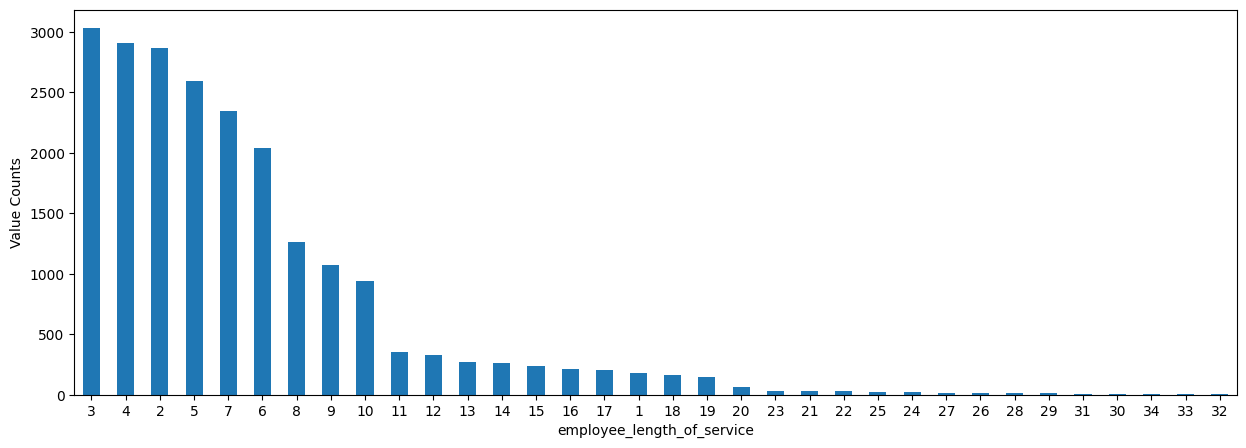

In [68]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There is a high number of employees with a short tenure, particularly those with 3 to 5 years of service.
- The number of employees decreases as the length of service increases, which is a common pattern in many organizations.
- There is a particularly sharp decrease after the first few years, indicating that either a lot of hiring has been done in recent years, or there is a high turnover rate within the first few years of service.
- Very few employees have extremely long tenures (over 20 years), which could suggest a relatively young organization, recent expansion, or few opportunities or incentives for long-term career development within the company.

In [69]:
#employees having length of service for more than 11 years, labelling them as 'LoS More Than 11' so that all the different data types are labelled as one.
def more_than_10(value):
    if value > 10:
        return 'LoS More Than 11'
    else:
        return value  # or '10 or Less' or any other label you want to use for values 10 or below

# Apply the function to the 'length_of_service' column
df.loc[:,'employee_length_of_service'] = df['employee_length_of_service'].apply(more_than_10)

service_value_counts = df['employee_length_of_service'].value_counts()

C:\Users\ROG\AppData\Local\Temp\ipykernel_5252\1990593779.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5 4 9 ... 7 4 5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'employee_length_of_service'] = df['employee_length_of_service'].apply(more_than_10)


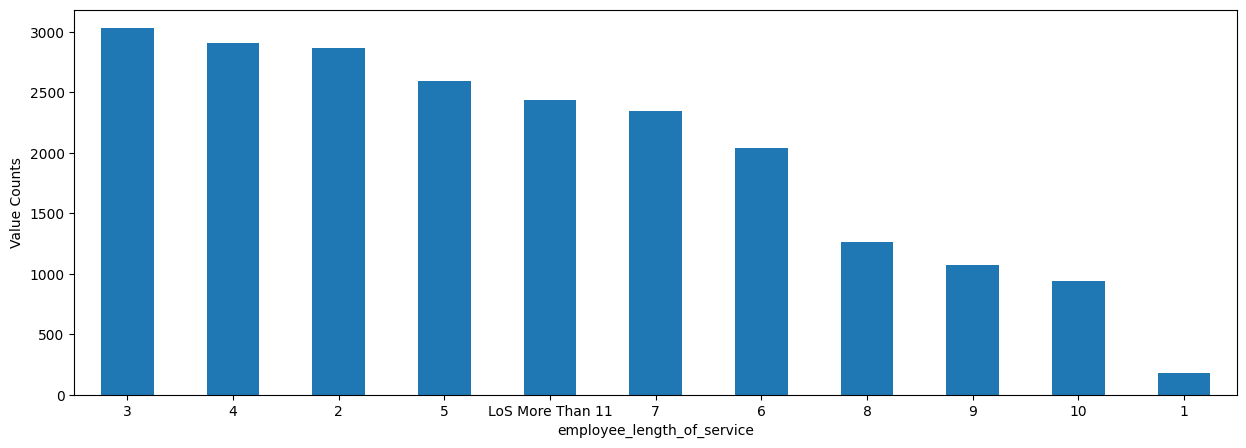

In [70]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

The category labeled "LoS More Than 11" is included, indicating that all employees with more than 11 years of service are grouped together in this bar. 

### Variable 10: employee_awards_won

In [71]:
awards_value_counts = df['employee_awards_won'].value_counts()

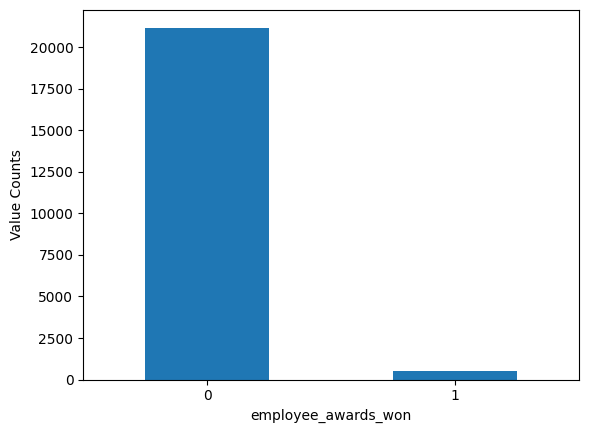

In [72]:
awards_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A large majority of employees (indicated by the bar labeled '0') have not won any awards.
- A relatively small number of employees (indicated by the bar labeled '1') have won awards.

- Awards may be given out selectively for exceptional performance or achievements, hence only a small number of employees have received them.
- The criteria for winning awards within this organization might be stringent, making it an accomplishment that few achieve.

### Variable 11: employee_avg_trainig_score

In [73]:
#checking out the distribution of values
counts = df['employee_avg_training_score'].value_counts()

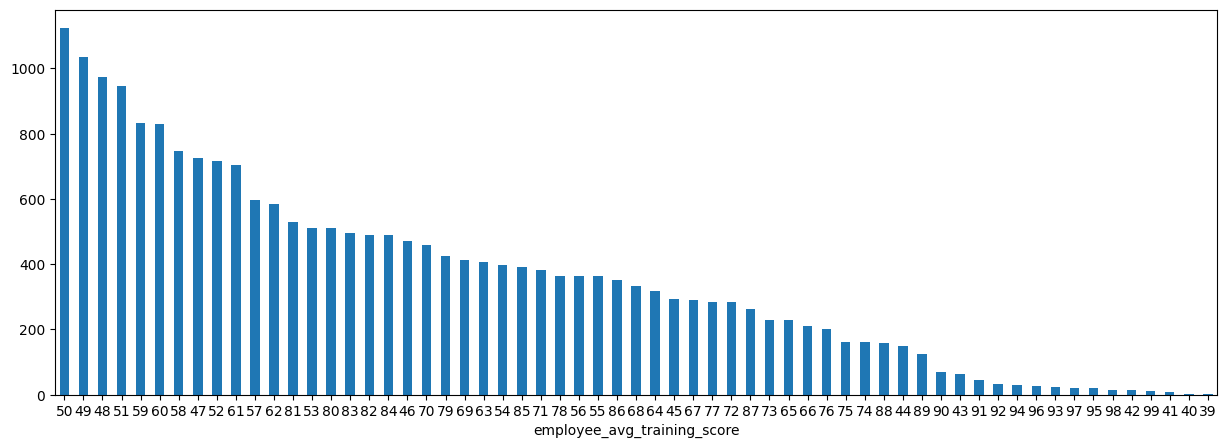

In [74]:
plt.figure(figsize=(15,5))
counts.plot(kind='bar', rot=0)
plt.show()

### Target Variable: employee_met_KPI > 80%

In [75]:
kpi_value_counts = df['employee_met_KPI > 80%'].value_counts()

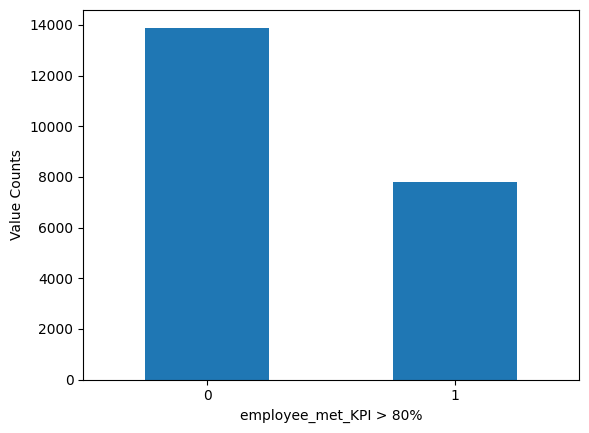

In [76]:
kpi_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The number of employees who did not meet the KPI (indicated by '0') is higher than those who did (indicated by '1').
- There are over 14000 instances of employees not meeting the KPI and around 8000 instances where employees met the KPI.

- The company may need to explore why a large proportion of employees are not meeting the KPI and implement training or development programs to support them.
- The KPI set at 80% might be too high, and the company could consider evaluating the KPI thresholds to ensure they are realistic and achievable.

In [77]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare Data
df_model = df.copy()

# Ensure target column is numeric
df_model['employee_met_KPI > 80%'] = df_model['employee_met_KPI > 80%'].astype(int)

# Drop non-numeric or high-cardinality categorical columns if needed
df_model = pd.get_dummies(df_model, drop_first=True)

# Split features and target
X = df_model.drop('employee_met_KPI > 80%', axis=1)
y = df_model['employee_met_KPI > 80%']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:23:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


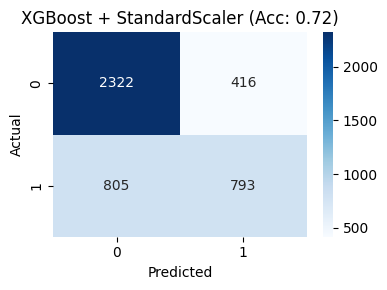

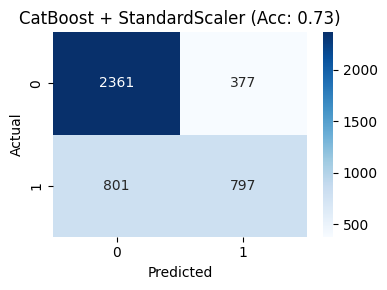

[LightGBM] [Info] Number of positive: 6185, number of negative: 11157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 17342, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356649 -> initscore=-0.589940
[LightGBM] [Info] Start training from score -0.589940


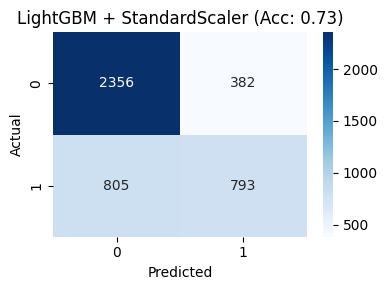

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:24:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


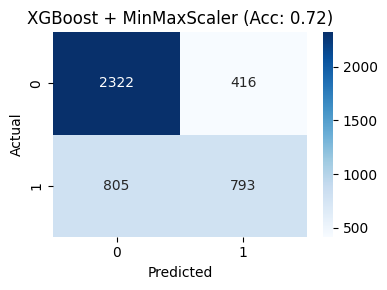

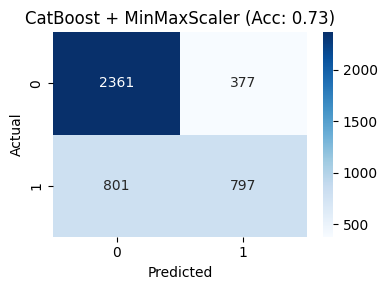

[LightGBM] [Info] Number of positive: 6185, number of negative: 11157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 17342, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356649 -> initscore=-0.589940
[LightGBM] [Info] Start training from score -0.589940


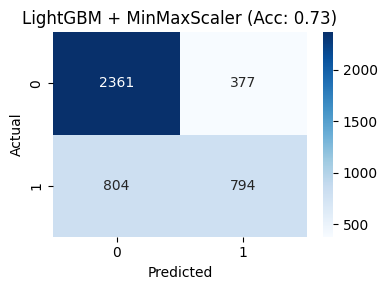

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:24:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


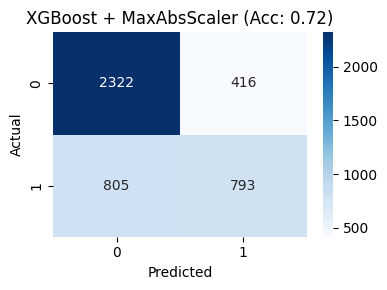

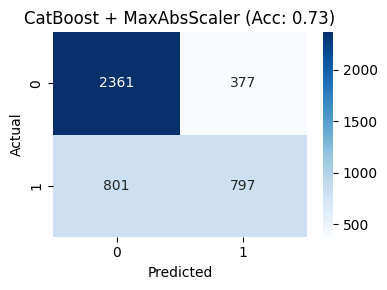

[LightGBM] [Info] Number of positive: 6185, number of negative: 11157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 17342, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356649 -> initscore=-0.589940
[LightGBM] [Info] Start training from score -0.589940


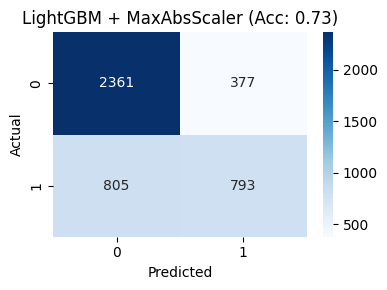

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:24:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


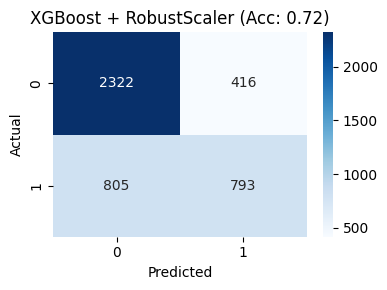

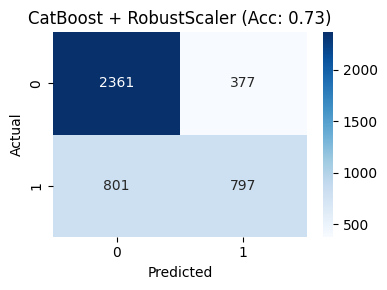

[LightGBM] [Info] Number of positive: 6185, number of negative: 11157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 17342, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356649 -> initscore=-0.589940
[LightGBM] [Info] Start training from score -0.589940


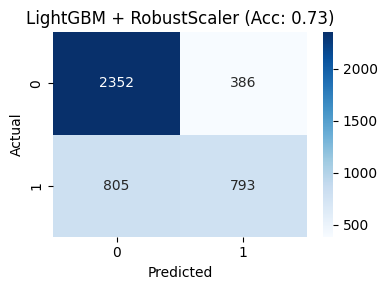

In [78]:

# Define scalers and models
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "RobustScaler": RobustScaler()
}

models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier()
}

results = []

# Iterate over scalers and models
for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        # Train and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Accuracy and Confusion Matrix
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store result
        results.append({
            "Scaler": scaler_name,
            "Model": model_name,
            "Accuracy": acc,
            "ConfusionMatrix": cm
        })

        # Optional: plot confusion matrix
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} + {scaler_name} (Acc: {acc:.2f})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()


In [79]:
# Sort and display top results
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
print("🔝 Top Model-Scaler Combinations:\n")
print(results_df_sorted[['Scaler', 'Model', 'Accuracy']].head())


🔝 Top Model-Scaler Combinations:

            Scaler     Model  Accuracy
1   StandardScaler  CatBoost  0.728321
4     MinMaxScaler  CatBoost  0.728321
7     MaxAbsScaler  CatBoost  0.728321
10    RobustScaler  CatBoost  0.728321
5     MinMaxScaler  LightGBM  0.727629


### Make a final decision on the model to be employed for this purpose

## criteria to be followed
| Goal                                       | Model Choice                   |
| ------------------------------------------ | ------------------------------ |
| **Highest accuracy**                       | Model + Scaler with top result |
| **Production-ready, balanced performance** | LightGBM or CatBoost           |
| **Auto-handling of categorical features**  | CatBoost                       |
| **Speed on large datasets**                | LightGBM       

Based on the previous analysis and the comparison of different models and scaling techniques, I recommend using the **LightGBM model with the Standard Scaler** for predicting employee performance. This recommendation is made considering the highest test set accuracy achieved with this combination and other factors such as model efficiency, scalability, and ease of interpretation.

### Conclusion

The choice of LightGBM with Standard Scaler is based on achieving a balance between high accuracy, efficiency, and scalability. This model is well-suited for predicting employee performance as it can handle the complexities and nuances of employee data effectively, providing insights that are both accurate and actionable.